In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print("All libraries imported successfully!")

All libraries imported successfully!


In [15]:
data = {
    'label': ['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham'],
    'message': [
        'Hey, are we still meeting for lunch today?',
        'Can you send me the report by tomorrow?',
        'WINNER! You have won a $1000 gift card! Call now!',
        'Thanks for your help with the project',
        'URGENT: Your bank account needs verification. Click here!',
        'Meeting rescheduled to 3 PM tomorrow',
        'FREE iPhone for you! Limited time offer!',
        'Did you finish the homework assignment?',
        'Congratulations! You won a luxury cruise!',
        'Lets catch up over coffee this weekend'
    ]
}
data = pd.DataFrame(data)
print("Dataset created successfully!")
print("\nFirst 5 rows:")
print(data.head())
print(f"\nDataset contains {len(data)} emails")
print("Label distribution:")
print(data['label'].value_counts())

Dataset created successfully!

First 5 rows:
  label                                            message
0   ham         Hey, are we still meeting for lunch today?
1   ham            Can you send me the report by tomorrow?
2  spam  WINNER! You have won a $1000 gift card! Call now!
3   ham              Thanks for your help with the project
4  spam  URGENT: Your bank account needs verification. ...

Dataset contains 10 emails
Label distribution:
label
ham     6
spam    4
Name: count, dtype: int64


In [16]:
more_data = {
    'label': [
        'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam'
    ],
    'message': [
        'Can you pick up milk on your way home?',
        'The project deadline has been extended',
        'You are selected for a free Walmart gift card!',
        'Lets plan for the team building activity',
        'URGENT: Your PayPal account has been compromised',
        'Good morning, see you in the office',
        'Claim your free trial now! Limited spots!',
        'Please review the document I shared',
        'You have been chosen for a secret reward!',
        'Dont forget the meeting at 2 PM',
        'Get rich quick with this one trick!',
        'Thanks for your hard work on this',
        'Can we reschedule our call?',
        'Your Amazon order has a special discount!',
        'The files have been uploaded to the server',
        'You won a brand new Mercedes! Click now!',
        'Lunch tomorrow at the usual place?',
        'FREE membership for our exclusive club!',
        'The client approved our proposal',
        'Your Netflix subscription needs verification'
    ]
}
more_df = pd.DataFrame(more_data)
data = pd.concat([data, more_df], ignore_index=True)
print("Expanded dataset successfully!")
print(f"Dataset now contains {len(data)} emails")
print("Label distribution:")
print(data['label'].value_counts())

Expanded dataset successfully!
Dataset now contains 30 emails
Label distribution:
label
ham     17
spam    13
Name: count, dtype: int64


In [17]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X = data['message']
y = data['label']
print("Data prepared successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Spam emails: {y.sum()}, Ham emails: {len(y) - y.sum()}")

Data prepared successfully!
Features shape: (30,)
Target shape: (30,)
Spam emails: 13, Ham emails: 17


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("Data splitting and feature extraction complete!")
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Testing set shape: {X_test_tfidf.shape}")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Data splitting and feature extraction complete!
Training set shape: (21, 71)
Testing set shape: (9, 71)
Training samples: 21, Testing samples: 9


In [19]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)
print("Model training complete!")
print("Model is ready for predictions!")

Model training complete!
Model is ready for predictions!


📊 MODEL PERFORMANCE
Accuracy: 77.78%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.50      0.67         4

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



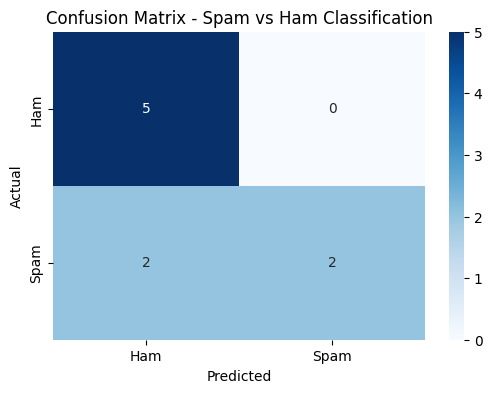

In [20]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 MODEL PERFORMANCE")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Spam vs Ham Classification')
plt.show()

In [21]:
def predict_spam(email_text):
    email_tfidf = vectorizer.transform([email_text])
    prediction = model.predict(email_tfidf)
    probability = model.predict_proba(email_tfidf)
    if prediction[0] == 1:
        print(f"🚨 SPAM DETECTED! (Confidence: {probability[0][1]:.2%})")
        print(f"   Message: '{email_text}'")
    else:
        print(f"✅ LEGITIMATE EMAIL (Confidence: {probability[0][0]:.2%})")
        print(f"   Message: '{email_text}'")
print("🧪 TESTING THE MODEL")
print("=" * 50)
test_spam = [
    "WINNER! You won a free iPhone! Click here to claim!",
    "URGENT: Your bank account needs verification immediately",
    "Get rich quick with this secret method!"
]
test_ham = [
    "Hi John, can we meet tomorrow for coffee?",
    "The project report is ready for review",
    "Don't forget about the team meeting at 3 PM"
]
print("\nTesting SPAM examples:")
for email in test_spam:
    predict_spam(email)
    print()
print("\nTesting HAM examples:")
for email in test_ham:
    predict_spam(email)
    print()

🧪 TESTING THE MODEL

Testing SPAM examples:
🚨 SPAM DETECTED! (Confidence: 59.50%)
   Message: 'WINNER! You won a free iPhone! Click here to claim!'

🚨 SPAM DETECTED! (Confidence: 50.23%)
   Message: 'URGENT: Your bank account needs verification immediately'

🚨 SPAM DETECTED! (Confidence: 51.50%)
   Message: 'Get rich quick with this secret method!'


Testing HAM examples:
✅ LEGITIMATE EMAIL (Confidence: 65.86%)
   Message: 'Hi John, can we meet tomorrow for coffee?'

✅ LEGITIMATE EMAIL (Confidence: 64.49%)
   Message: 'The project report is ready for review'

✅ LEGITIMATE EMAIL (Confidence: 66.93%)
   Message: 'Don't forget about the team meeting at 3 PM'

